In [1]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [3]:
N = 100000 # Number of episodes
side = 10

In [4]:
# Agent/Environment initialization

In [5]:
env = Environment.square(initial_state_range=1, side = side)

#agent = Agent(GAMMA = 1)
BETA = 5
agent = Agent(env, GAMMA=0.99, ALPHA=0.3 / BETA, BETA=BETA, do_reward = True)
#agent = Agent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


OBS_LEAK = 1e-2 / env.N_obs
#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True)

{0: {'E': 1, 'S': 10}, 1: {'E': 2, 'W': 0, 'S': 11}, 2: {'E': 3, 'W': 1, 'S': 12}, 3: {'E': 4, 'W': 2, 'S': 13}, 4: {'E': 5, 'W': 3, 'S': 14}, 5: {'E': 6, 'W': 4, 'S': 15}, 6: {'E': 7, 'W': 5, 'S': 16}, 7: {'E': 8, 'W': 6, 'S': 17}, 8: {'E': 9, 'W': 7, 'S': 18}, 9: {'W': 8, 'S': 19}, 10: {'E': 11, 'S': 20, 'N': 0}, 11: {'E': 12, 'W': 10, 'S': 21, 'N': 1}, 12: {'E': 13, 'W': 11, 'S': 22, 'N': 2}, 13: {'E': 14, 'W': 12, 'S': 23, 'N': 3}, 14: {'E': 15, 'W': 13, 'S': 24, 'N': 4}, 15: {'E': 16, 'W': 14, 'S': 25, 'N': 5}, 16: {'E': 17, 'W': 15, 'S': 26, 'N': 6}, 17: {'E': 18, 'W': 16, 'S': 27, 'N': 7}, 18: {'E': 19, 'W': 17, 'S': 28, 'N': 8}, 19: {'W': 18, 'S': 29, 'N': 9}, 20: {'E': 21, 'S': 30, 'N': 10}, 21: {'E': 22, 'W': 20, 'S': 31, 'N': 11}, 22: {'E': 23, 'W': 21, 'S': 32, 'N': 12}, 23: {'E': 24, 'W': 22, 'S': 33, 'N': 13}, 24: {'E': 25, 'W': 23, 'S': 34, 'N': 14}, 25: {'E': 26, 'W': 24, 'S': 35, 'N': 15}, 26: {'E': 27, 'W': 25, 'S': 36, 'N': 16}, 27: {'E': 28, 'W': 26, 'S': 37, 'N': 1

In [6]:
for i in range(N):
    trainer.run_episode()
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("Total reward got: %.4f" % trainer.total_reward)

1
Trajectory:  [1, 0, 10, 11, 21, 11, 1, 1, 2, 12, 2, 1, 1, 11, 10, 10, 10, 11, 12]
Total reward got: 0.0000
1001
Trajectory:  [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Total reward got: 0.0000
2001
Trajectory:  [0, 10, 20, 30, 30, 30, 40, 50, 51, 61, 62, 61, 71, 72, 82, 92, 82, 92, 92]
Total reward got: 0.0000
3001
Trajectory:  [1, 2, 12, 13, 3, 4, 5, 6, 16, 6, 5, 4, 5, 6, 5, 5, 5, 6, 16]
Total reward got: 0.0000
4001
Trajectory:  [0, 10, 20, 30, 40, 30, 40, 30, 31, 30, 40, 50, 51, 50, 40, 30, 40, 50, 51]
Total reward got: 0.0000
5001
Trajectory:  [1, 2, 12, 13, 3, 4, 14, 4, 4, 14, 4, 4, 14, 15, 5, 15, 25, 26, 27]
Total reward got: 0.0000
6001
Trajectory:  [1, 2, 12, 13, 3, 3, 3, 4, 3, 2, 1, 2, 1, 2, 1, 2, 12, 13, 3]
Total reward got: 0.0000
7001
Trajectory:  [1, 2, 12, 11, 21, 31, 32, 33, 32, 22, 21, 22, 23, 22, 21, 22, 23, 24, 25]
Total reward got: 0.0000
8001
Trajectory:  [0, 10, 20, 21, 31, 32, 31, 41, 40, 50, 60, 70, 80, 90, 90, 90, 90, 91, 92]
T

71001
Trajectory:  [1, 2, 3, 13, 23, 24, 34, 35, 25, 35, 36, 37, 47, 46, 47, 57, 67, 77, 87]
Total reward got: 0.0000
72001
Trajectory:  [0, 10, 11, 12, 13, 23, 33, 32, 31, 21, 22, 32, 22, 32, 31, 41, 31, 41, 31]
Total reward got: 0.0000
73001
Trajectory:  [0, 0, 0, 0, 10, 11, 21, 31, 32, 33, 34, 35, 45, 55, 54, 64, 74, 73, 83]
Total reward got: 0.0000
74001
Trajectory:  [1, 2, 1, 2, 1, 2, 3, 13, 23, 22, 32, 31, 32, 42, 52, 53, 43, 44, 43]
Total reward got: 0.0000
75001
Trajectory:  [1, 2, 12, 13, 12, 13, 12, 13, 3, 4, 14, 4, 5, 6, 6, 6, 16, 6, 5]
Total reward got: 0.0000
76001
Trajectory:  [1, 2, 3, 3, 4, 14, 15, 5, 5, 5, 5, 5, 5, 6, 16, 6, 7, 7, 17]
Total reward got: 0.0000
77001
Trajectory:  [0, 10, 20, 20, 21, 22, 12, 2, 12, 2, 3, 2, 12, 11, 10, 11, 21, 31, 41]
Total reward got: 0.0000
78001
Trajectory:  [1, 2, 1, 2, 12, 11, 10, 20, 21, 31, 30, 40, 30, 30, 40, 41, 42, 41, 51]
Total reward got: 0.0000
79001
Trajectory:  [1, 2, 12, 11, 12, 2, 1, 2, 1, 2, 12, 13, 23, 33, 43, 44, 43, 3

In [7]:
agent.Q_var

array([[-2.16968295e+00, -6.35146486e-02, -2.22791478e+00,
        -3.09923620e-01],
       [ 2.87157991e-06, -2.84684428e+00, -2.80321122e+00,
        -3.24325571e+00],
       [-6.75753353e-02, -2.87343962e-01, -3.81949558e-01,
        -4.88563002e+00],
       [-9.64636470e-02, -2.00469280e-01, -4.42708917e-01,
        -2.14903882e-01],
       [-1.53706704e-01, -1.16849772e-01, -2.29619295e-01,
        -3.06714020e-01],
       [-1.13030879e-01, -2.21023938e-01, -2.53707272e-01,
        -1.79096803e-01],
       [-2.56463508e-01, -9.89452174e-02, -2.47746923e-01,
        -2.06636176e-01],
       [-1.46137459e-01, -1.77592221e-01, -1.81148718e-01,
        -2.14612853e-01],
       [ 5.74231874e-02, -1.12333949e-01, -2.02498554e-01,
        -8.13060732e-02],
       [-5.79734433e-02, -5.51776814e-02, -8.98859591e-02,
         3.30419436e-02],
       [-2.00786410e-01, -1.45597361e-01, -7.57859929e+00,
        -2.84661743e+00],
       [-2.69712425e-01, -2.07924684e-01, -2.91200240e-01,
      

In [8]:
obs = env.get_observation()
agent.Q_var[0,:]

array([-2.16968295, -0.06351465, -2.22791478, -0.30992362])

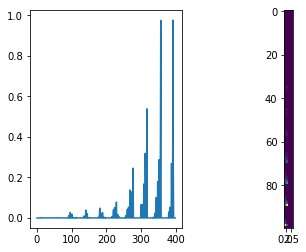

In [9]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)

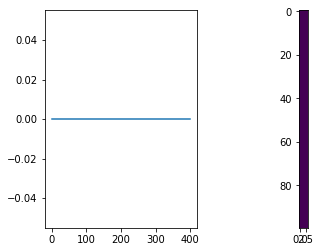

In [10]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)

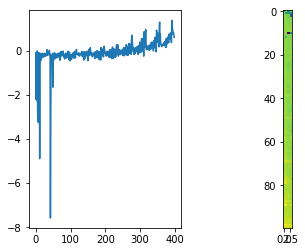

In [11]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)

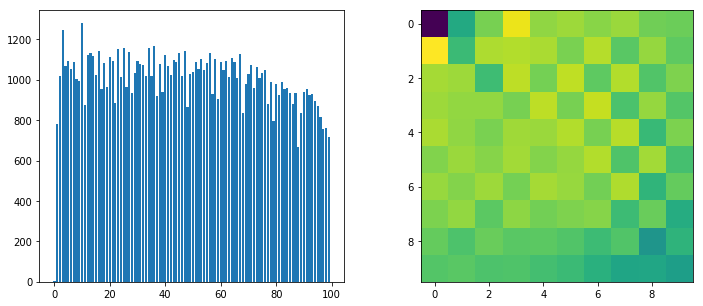

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))

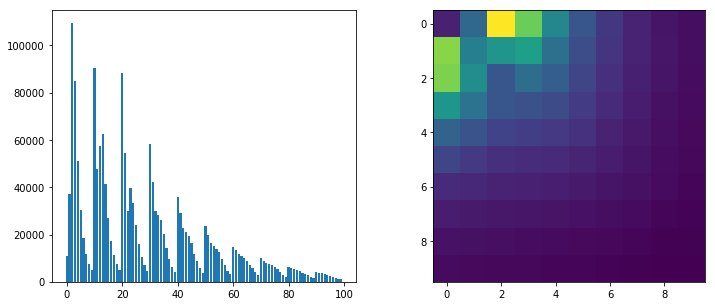

In [13]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))

[9.08589009e-05 7.76017023e+01 1.19159359e+02 1.24536101e+02
 9.94096698e+01 1.06843829e+02 1.04250405e+02 1.12297159e+02
 1.09640554e+02 9.37673197e+01 7.70962628e+01 9.68517765e+01
 1.24986361e+02 1.13093960e+02 1.09631754e+02 1.13377522e+02
 1.14974686e+02 9.11073829e+01 1.06820385e+02 1.02371385e+02
 1.11668938e+02 1.22618555e+02 8.87981436e+01 1.09846519e+02
 1.03376214e+02 1.16033990e+02 9.73304412e+01 1.10627275e+02
 9.96973470e+01 1.00846525e+02 1.05660598e+02 1.19789237e+02
 1.15495023e+02 9.44865880e+01 1.01970798e+02 1.08588663e+02
 1.15835740e+02 8.99094990e+01 1.05145502e+02 9.94940823e+01
 1.11311980e+02 1.03073094e+02 9.73067573e+01 1.13997250e+02
 1.07176747e+02 1.18442729e+02 9.91320673e+01 1.16923101e+02
 9.11738968e+01 1.00644114e+02 9.92573633e+01 1.06582118e+02
 1.15046089e+02 1.10018765e+02 1.04995787e+02 1.04566770e+02
 1.22273400e+02 8.86034000e+01 1.13867195e+02 9.12685986e+01
 1.13160011e+02 1.03849437e+02 1.00448839e+02 1.06280338e+02
 1.01667679e+02 1.130170

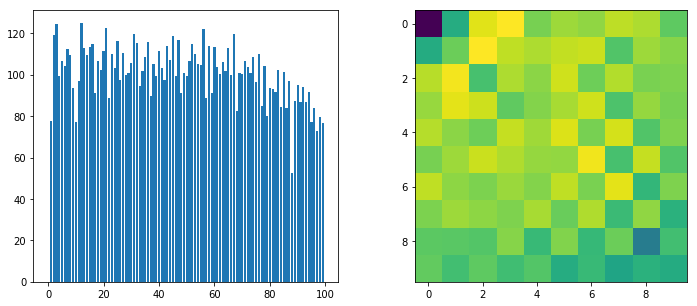

In [14]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))

[150.64271647 221.0883585  597.92755356 492.77173292 292.67796385
 168.17858423 110.5062501   65.62245899  27.88178119  22.95367896
 556.67610508 456.33461206 327.81366683 331.79575177 189.78398052
 140.79183533  91.57044947  52.69249572  37.11869048  24.73279178
 562.37647289 355.71836669 201.84563302 243.58129009 188.06420631
 169.21284353 111.19921618  46.95367241  32.53966907  15.49959765
 265.85955765 221.28163079 168.94858489 111.2288172  129.76140267
 124.45351236  84.52332146  52.66087249  31.25190567  16.75893444
 147.09591324 149.41211117 103.71705751  79.8949302   92.02864979
  70.20355095  66.88821413  44.84624157  32.12046451  29.27163723
 104.98059981  91.1257394   81.40571404  74.20437193  83.49290644
  54.4430902   53.05910885  36.08823915  16.35835776  19.51523715
  72.84421746  56.77556563  55.12933009  62.05347359  63.63124887
  46.01991548  30.03175551  30.82525925  20.63196487  16.83802644
  42.9595563   32.32971664  29.50029047  37.2041405   39.35442385
  36.52338

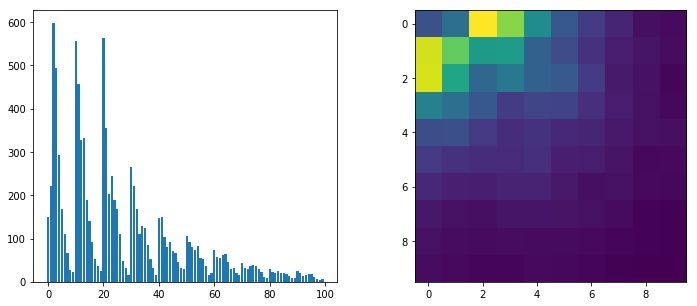

In [15]:
print(trainer.obs_score)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))

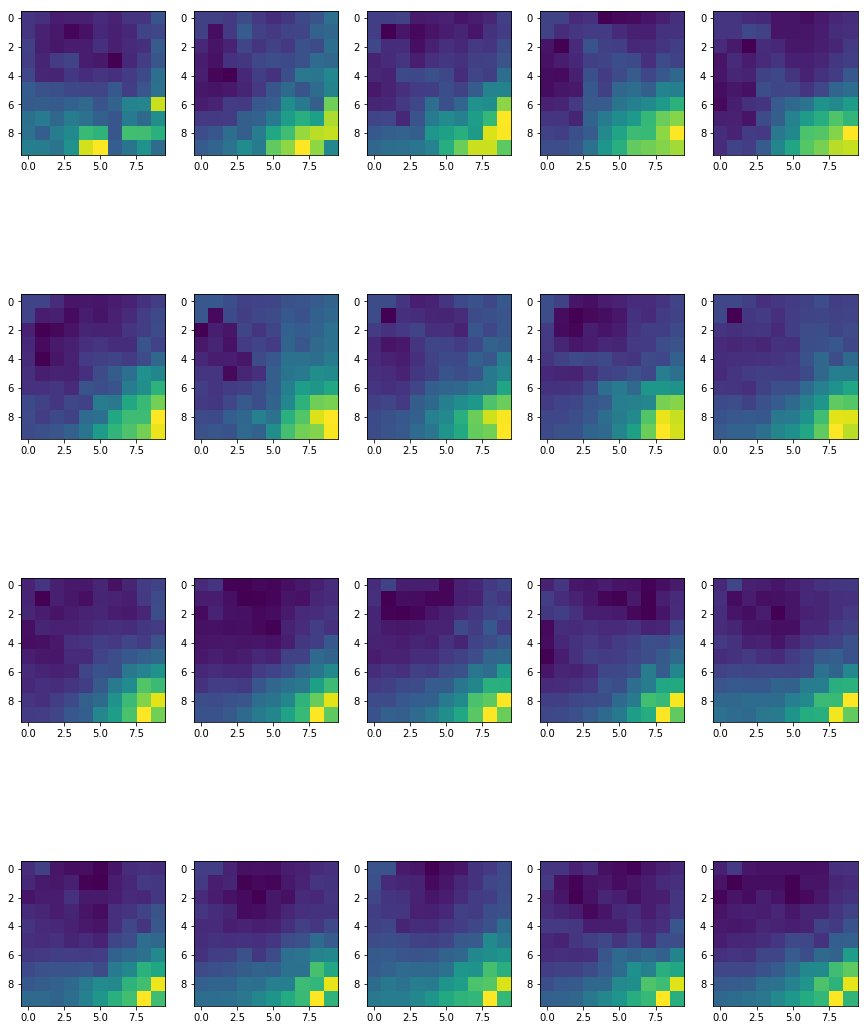

In [16]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(side,side))

In [17]:
trainer.mem_V

{100: array([-0.01772635, -0.62122107, -0.22530355, -0.03146301,  0.42655712,
         0.39956258,  0.00839432,  0.0802609 ,  0.03836075,  0.        ,
        -0.00554125, -1.17511458, -0.19569151,  0.0224363 ,  0.1951252 ,
         0.12562926,  0.02618286,  0.03859757,  0.        ,  0.        ,
        -0.44551702, -0.75923348, -0.35187705,  0.03409143,  0.13873641,
         0.1162561 ,  0.09670597,  0.02614781,  0.        ,  0.        ,
        -0.04331206, -0.21960415, -0.31191804, -0.20179268, -0.04695214,
         0.01563653,  0.09418017,  0.10296843,  0.06827568,  0.        ,
        -0.11077177, -0.01302083, -0.04714649, -0.01360104, -0.01360104,
         0.07534352,  0.05111241,  0.02430568,  0.02430568,  0.        ,
        -0.05476934, -0.01302083, -0.10867446, -0.04039769, -0.04111409,
         0.01157737,  0.        ,  0.02430568,  0.02430568,  0.        ,
        -0.02197162, -0.02197162, -0.01360104,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,